# Neural Style Transfer

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import vgg19
from utils import *

In [2]:
# Summary of the VGG19 model 
displayVGG19()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### You can update the path for Content image and Style image in the below cell

In [3]:
# Path for content and style image 
contentImagePath = "./input/7-content.jpg"
styleImagePath = "./input/8-style.jpg"

In [4]:
contentImage = np.asarray(tf.keras.preprocessing.image.load_img(contentImagePath, target_size = (512, 512)))
styleImage = np.asarray(tf.keras.preprocessing.image.load_img(styleImagePath, target_size = (512, 512)))

Text(0.5, 1.0, 'Style Image')

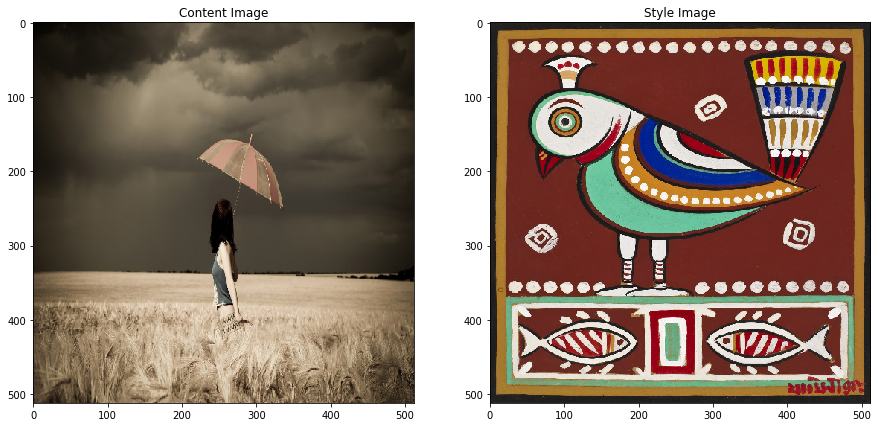

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax1.imshow(contentImage)
ax1.set_title("Content Image")
ax2.imshow(styleImage)
ax2.set_title("Style Image")

In [6]:
contentImage.shape, styleImage.shape

((512, 512, 3), (512, 512, 3))

In [7]:
processedContentImage, processedStyleImage = processImages(contentImage, styleImage)

In [8]:
baseModel = makeModel(CONTENT_LAYER, STYLE_LAYER)

In [9]:
contentImgOutputs = baseModel(processedContentImage)
styleImgOutputs = baseModel(processedStyleImage)
len(contentImgOutputs), len(styleImgOutputs)

(5, 5)

In [10]:
print("Shape of the outputs from base model of different layers : ")
print(contentImgOutputs[0].shape, styleImgOutputs[0].shape)
print(contentImgOutputs[1].shape, styleImgOutputs[1].shape)
print(contentImgOutputs[2].shape, styleImgOutputs[2].shape)
print(contentImgOutputs[3].shape, styleImgOutputs[3].shape)
print(contentImgOutputs[4].shape, styleImgOutputs[4].shape)

Shape of the outputs from base model of different layers : 
(1, 32, 32, 512) (1, 32, 32, 512)
(1, 512, 512, 64) (1, 512, 512, 64)
(1, 256, 256, 128) (1, 256, 256, 128)
(1, 128, 128, 256) (1, 128, 128, 256)
(1, 64, 64, 512) (1, 64, 64, 512)


#### Visualizing the Gram matrices

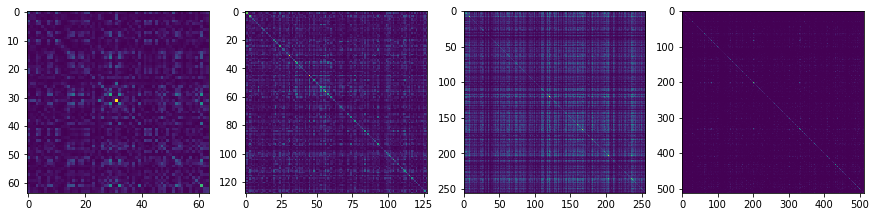

In [11]:
gramMatrices = []
for i in range(1, 5):
    gramMatrices.append(getGramMatrix(styleImgOutputs[i]))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax1.imshow(gramMatrices[0][0].numpy())
ax2.imshow(gramMatrices[1][0].numpy())
ax3.imshow(gramMatrices[2][0].numpy())
ax4.imshow(gramMatrices[3][0].numpy())

In [12]:
processedContentVar = tf.Variable(processedContentImage + tf.random.normal(processedContentImage.shape))

#### You can change the number of iterations in the below cell. More number of iterations leads to more style capture

In [13]:
# Number of iterations to train the target image
numIterations = 100

In [14]:
# Calling the driver function
images, losses, bestImage = neuralStyleTransfer(processedContentVar, contentImgOutputs, styleImgOutputs, numIterations, baseModel)

99

<tf.Tensor: shape=(), dtype=float32, numpy=269598940.0>

### Output image

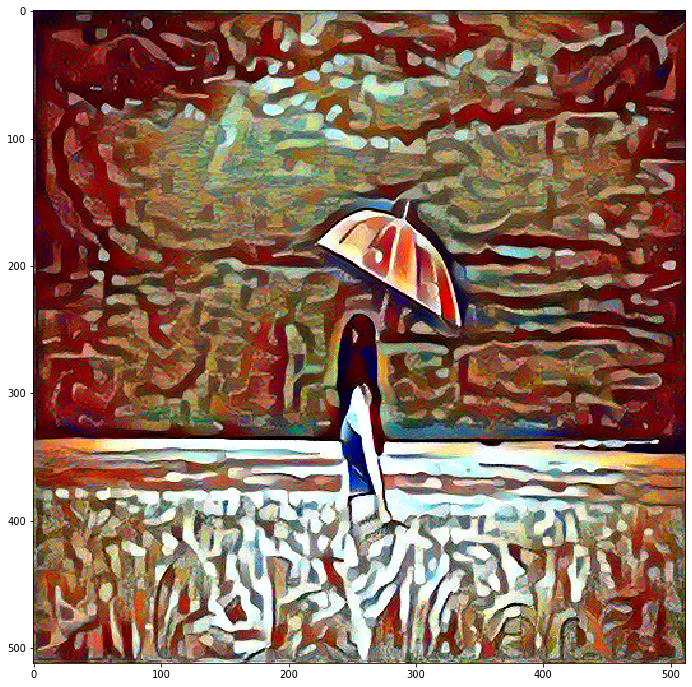

In [15]:
# Plotting the output image
deprocessedBestImage = deprocess(bestImage)
plt.figure(figsize=(12, 12))
plt.imshow(deprocessedBestImage[0]/255)

In [16]:
import cv2 as cv

### Run the below cell to save the conversion video (the video will be saved in conversionVideo folder in .avi format)

In [17]:
# Creating a .avi video from the images present in python list images

height = 512
width = 512

fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 5
video_filename = "ouput1.avi"
out = cv.VideoWriter("./conversionVideo/" + video_filename, fourcc, fps, (width, height))


for item in images:
    i = deprocess(item)
    gray = cv.normalize(np.float32(i[0]), None, 255, 0, norm_type = cv.NORM_MINMAX, dtype = cv.CV_8U)
    out.write(gray)
out.release()

### Run the below cell to save the final output image (The image wil be saved in outputs folder in .png format)

In [18]:
# Saving the output image
plt.imsave("./outputs/output1.png", np.asarray(deprocessedBestImage[0]/255), format = "png")

<br>

## Some Extensions

### 1. Multiple style image transfer

### You can update the path for Content image, Style image1 and Style image2 in the below cell

In [19]:
# Path for content and style image1 and style image2
contentImagePath = "./input/4-content.jpg"
styleImagePath1 = "./input/4-style.jpg"
styleImagePath2 = "./input/7-style.png"

In [20]:
contentImage = np.asarray(tf.keras.preprocessing.image.load_img(contentImagePath, target_size = (512, 512)))
styleImage1 = np.asarray(tf.keras.preprocessing.image.load_img(styleImagePath1, target_size = (512, 512)))
styleImage2 = np.asarray(tf.keras.preprocessing.image.load_img(styleImagePath2, target_size = (512, 512)))

Text(0.5, 1.0, 'Style Image2')

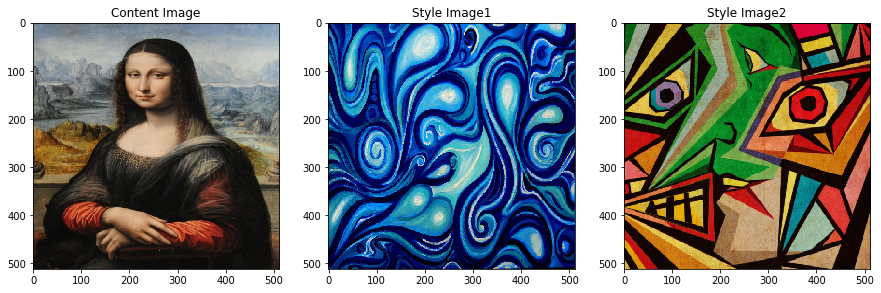

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
fig.set_figheight(15)
fig.set_figwidth(15)
ax1.imshow(contentImage)
ax1.set_title("Content Image")
ax2.imshow(styleImage1)
ax2.set_title("Style Image1")
ax3.imshow(styleImage2)
ax3.set_title("Style Image2")

In [22]:
contentImage.shape, styleImage1.shape, styleImage2.shape

((512, 512, 3), (512, 512, 3), (512, 512, 3))

In [23]:
processedContentImage, processedStyleImage1, processedStyleImage2 = processImagesMultiple(contentImage, styleImage1, styleImage2)

In [24]:
contentImgOutputs = baseModel(processedContentImage)
styleImgOutputs1 = baseModel(processedStyleImage1)
styleImgOutputs2 = baseModel(processedStyleImage2)
len(contentImgOutputs), len(styleImgOutputs1), len(styleImgOutputs2)

(5, 5, 5)

#### You can change the number of iterations in the below cell. More number of iterations leads to more style capture

In [25]:
# Number of iterations for training the target images
numIterations = 50

In [26]:
processedContentVar = tf.Variable(processedContentImage + tf.random.normal(processedContentImage.shape))
images1, losses1, Image1 = neuralStyleTransferForMultipleImages(processedContentVar, contentImgOutputs, styleImgOutputs1, styleImgOutputs2, numIterations, baseModel, 1.0, 0)

49

<tf.Tensor: shape=(), dtype=float32, numpy=2045526900.0>

In [27]:
processedContentVar = tf.Variable(processedContentImage + tf.random.normal(processedContentImage.shape))
images2, losses2, Image2 = neuralStyleTransferForMultipleImages(processedContentVar, contentImgOutputs, styleImgOutputs1, styleImgOutputs2, numIterations, baseModel, 0.5, 0.5)

49

<tf.Tensor: shape=(), dtype=float32, numpy=7655505000.0>

In [28]:
processedContentVar = tf.Variable(processedContentImage + tf.random.normal(processedContentImage.shape))
images3, losses3, Image3 = neuralStyleTransferForMultipleImages(processedContentVar, contentImgOutputs, styleImgOutputs1, styleImgOutputs2, numIterations, baseModel, 0, 1.0)

49

<tf.Tensor: shape=(), dtype=float32, numpy=865008640.0>

### Outputs

Text(0.5, 1.0, 'Style1 - 0 %, Style2 - 100%')

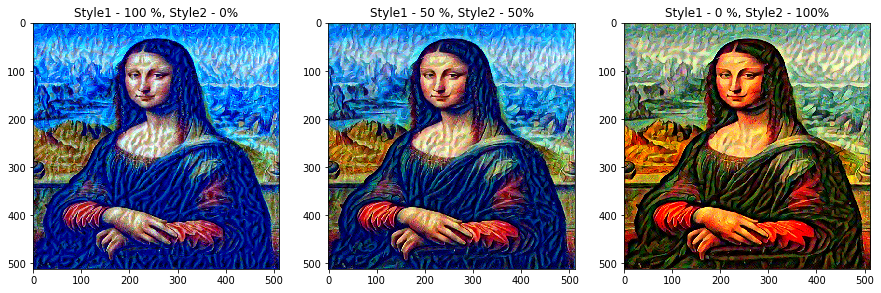

In [29]:
deprocessedBestImage1 = deprocess(Image1)
deprocessedBestImage2 = deprocess(Image2)
deprocessedBestImage3 = deprocess(Image3)
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
fig.set_figheight(15)
fig.set_figwidth(15)
ax1.imshow(deprocessedBestImage1[0]/255)
ax1.set_title("Style1 - 100 %, Style2 - 0%")
ax2.imshow(deprocessedBestImage2[0]/255)
ax2.set_title("Style1 - 50 %, Style2 - 50%")
ax3.imshow(deprocessedBestImage3[0]/255)
ax3.set_title("Style1 - 0 %, Style2 - 100%")

### Run the below cell to save the final output images (The images wil be saved in outputs folder in .png format)

In [30]:
plt.imsave("./outputs/variation1.png", np.asarray(deprocessedBestImage1[0]/255), format = "png")
plt.imsave("./outputs/variation2.png", np.asarray(deprocessedBestImage2[0]/255), format = "png")
plt.imsave("./outputs/variation3.png", np.asarray(deprocessedBestImage3[0]/255), format = "png")

<br>

### 2. Applying different style image to different parts of content image

### You can update the path for Content image, Style image1 and Style image2 in the below cell

In [31]:
# Path for content and style image1 and style image2
contentImagePath = "./input/6-content.jpg"
styleImage1Path = "./input/8-style.jpg"
styleImage2Path = "./input/4-style.jpg"

In [32]:
Image = np.asarray(tf.keras.preprocessing.image.load_img(contentImagePath, target_size = (512, 512)))
styleImage1 = np.asarray(tf.keras.preprocessing.image.load_img(styleImage1Path, target_size = (256, 256)))
styleImage2 = np.asarray(tf.keras.preprocessing.image.load_img(styleImage2Path, target_size = (256, 256)))

Text(0.5, 1.0, 'Style Image')

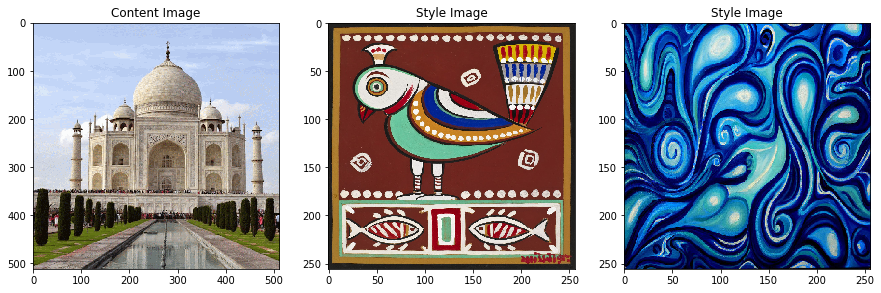

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
fig.set_figheight(15)
fig.set_figwidth(15)
ax1.imshow(Image)
ax1.set_title("Content Image")
ax2.imshow(styleImage1)
ax2.set_title("Style Image")
ax3.imshow(styleImage2)
ax3.set_title("Style Image")

In [34]:
# Breaking the content image into 4 parts so as to apply the different style images individually to these parts. 

contentImage1 = np.zeros((256, 256, 3))
for i in range (0, 256):
    for j in range (0, 256):
        for k in range (0, 3):
            contentImage1[i][j][k] = Image[i][j][k]
contentImage2 = np.zeros((256, 256, 3))
for i in range (0, 256):
    for j in range (256, 512):
        for k in range (0, 3):
            contentImage2[i][j-256][k] = Image[i][j][k]
contentImage3 = np.zeros((256, 256, 3))
for i in range (256, 512):
    for j in range (0, 256):
        for k in range (0, 3):
            contentImage3[i-256][j][k] = Image[i][j][k]
contentImage4 = np.zeros((256, 256, 3))
for i in range (256, 512):
    for j in range (256, 512):
        for k in range (0, 3):
            contentImage4[i-256][j-256][k] = Image[i][j][k]

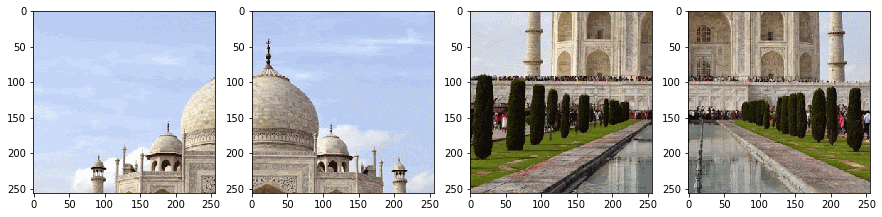

In [35]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax1.imshow(contentImage1/255)
ax2.imshow(contentImage2/255)
ax3.imshow(contentImage3/255)
ax4.imshow(contentImage4/255)

In [36]:
processedContentImage1 = vgg19.preprocess_input(np.expand_dims(contentImage1, axis = 0))
processedContentImage2 = vgg19.preprocess_input(np.expand_dims(contentImage2, axis = 0))
processedContentImage3 = vgg19.preprocess_input(np.expand_dims(contentImage3, axis = 0))
processedContentImage4 = vgg19.preprocess_input(np.expand_dims(contentImage4, axis = 0))
processedStyleImage1 = vgg19.preprocess_input(np.expand_dims(styleImage1, axis = 0))
processedStyleImage2 = vgg19.preprocess_input(np.expand_dims(styleImage2, axis = 0))

In [37]:
contentImg1Outputs = baseModel(processedContentImage1)
contentImg2Outputs = baseModel(processedContentImage2)
contentImg3Outputs = baseModel(processedContentImage3)
contentImg4Outputs = baseModel(processedContentImage4)
styleImgOutputs1 = baseModel(processedStyleImage1)
styleImgOutputs2 = baseModel(processedStyleImage2)

#### You can change the number of iterations in the below cell. More number of iterations leads to more style capture

In [38]:
# Number of iterations for training the target image
numIterations = 50

In [39]:
processedContent1Var = tf.Variable(processedContentImage1 + tf.random.normal(processedContentImage1.shape))
images1, losses1, bestImage1 = neuralStyleTransfer(processedContent1Var, contentImg1Outputs, styleImgOutputs1, numIterations, baseModel)

49

<tf.Tensor: shape=(), dtype=float32, numpy=223935700.0>

In [40]:
processedContent2Var = tf.Variable(processedContentImage2 + tf.random.normal(processedContentImage2.shape))
images2, losses2, bestImage2 = neuralStyleTransfer(processedContent2Var, contentImg2Outputs, styleImgOutputs2, numIterations, baseModel)

49

<tf.Tensor: shape=(), dtype=float32, numpy=575374000.0>

In [41]:
processedContent3Var = tf.Variable(processedContentImage3 + tf.random.normal(processedContentImage3.shape))
images3, losses3, bestImage3 = neuralStyleTransfer(processedContent3Var, contentImg3Outputs, styleImgOutputs2, numIterations, baseModel)

49

<tf.Tensor: shape=(), dtype=float32, numpy=271567550.0>

In [42]:
processedContent4Var = tf.Variable(processedContentImage4 + tf.random.normal(processedContentImage4.shape))
images4, losses4, bestImage4 = neuralStyleTransfer(processedContent4Var, contentImg4Outputs, styleImgOutputs1, numIterations, baseModel)

49

<tf.Tensor: shape=(), dtype=float32, numpy=147914600.0>

In [43]:
deprocessedBestImage1 = deprocess(bestImage1)
deprocessedBestImage2 = deprocess(bestImage2)
deprocessedBestImage3 = deprocess(bestImage3)
deprocessedBestImage4 = deprocess(bestImage4)

In [44]:
quater1 = np.asarray(deprocessedBestImage1[0])
quater2 = np.asarray(deprocessedBestImage2[0])
quater3 = np.asarray(deprocessedBestImage3[0])
quater4 = np.asarray(deprocessedBestImage4[0])

In [45]:
# Recombining the Content image

completeImage = np.zeros((512, 512, 3))
for i in range (0, 256):
    for j in range (0, 256):
        for k in range (0, 3):
            completeImage[i][j][k] = quater1[i][j][k]
for i in range (0, 256):
    for j in range (256, 512):
        for k in range (0, 3):
            completeImage[i][j][k] = quater2[i][j-256][k]
for i in range (256, 512):
    for j in range (0, 256):
        for k in range (0, 3):
            completeImage[i][j][k] = quater3[i-256][j][k]
for i in range (256, 512):
    for j in range (256, 512):
        for k in range (0, 3):
            completeImage[i][j][k] = quater4[i-256][j-256][k]

### Output image

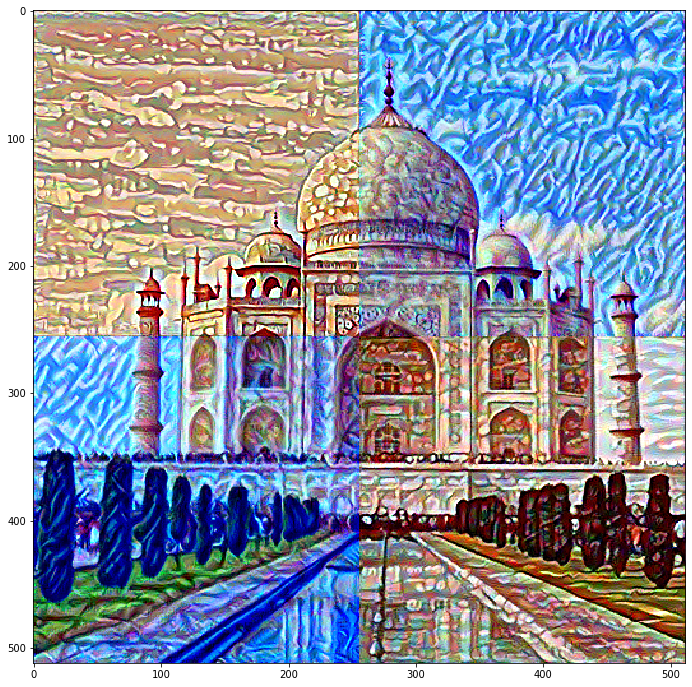

In [46]:
plt.figure(figsize = (12,12))
plt.imshow(completeImage/255)

In [48]:
images1[1].shape

TensorShape([1, 256, 256, 3])

### Run the below cell to save the final output image (The image wil be saved in outputs folder in .png format)

In [49]:
# Saving the ouput image
plt.imsave("./outputs/output.png", completeImage/255, format = "png")

In [50]:
listOfImages = []
for l in range (10):
    completeImages = np.zeros((512, 512, 3))
    for i in range (0, 256):
        for j in range (0, 256):
            for k in range (0, 3):
                completeImages[i][j][k] = np.asarray(images1[l][0][i][j][k])
    for i in range (0, 256):
        for j in range (256, 512):
            for k in range (0, 3):
                completeImages[i][j][k] = np.asarray(images2[l][0][i][j-256][k])
    for i in range (256, 512):
        for j in range (0, 256):
            for k in range (0, 3):
                completeImages[i][j][k] = np.asarray(images3[l][0][i-256][j][k])
    for i in range (256, 512):
        for j in range (256, 512):
            for k in range (0, 3):
                completeImages[i][j][k] = np.asarray(images4[l][0][i-256][j-256][k])
    listOfImages.append(completeImages)

### Run the below cell to save the conversion video (the video will be saved in conversionVideo folder in .avi format)

In [54]:
# # Creating a .avi video from the images present in python list listOFImages

height = 512
width = 512

fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 1
video_filename = "ouput2.avi"
out = cv.VideoWriter("./conversionVideo/" + video_filename, fourcc, fps, (width, height))


for i in listOfImages:
    gray = cv.normalize(np.float32(i), None, 255, 0, norm_type = cv.NORM_MINMAX, dtype = cv.CV_8U)
    out.write(gray)
out.release()